<a href="https://colab.research.google.com/github/ikonushok/My_projects/blob/main/%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_HW4_UltraLight_%D0%A3%D0%B3%D0%BB%D1%83%D0%B1%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задания уровня ultra-light:
1. Написать три рекуррентные сети, которые разбирали на уроке: RNN, LSTM, GRU
2. Допускается смотреть в ноутбук урока, но код необходимо писать самостоятельно

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#RNN, LSTM, GRU

## SimpleRNN

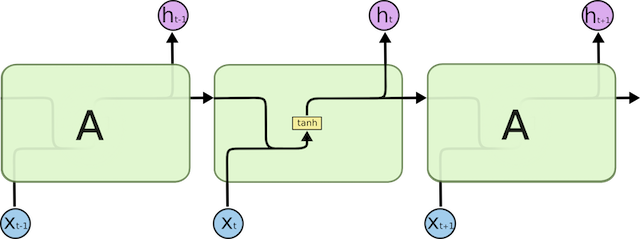


In [ ]:
class custom_rnn():
  # Состояние нейронной сети при инициализации
  # input_dim - размер входного пространства (Х)
  # hidden_dim - размер скрытого пространства (h)
  # activation - функция активации (np.tanh)
  def __init__(self, input_dim, hidden_dim, activation=np.tanh):              
    self.h = np.zeros(hidden_dim)                                                   # При создании верктор состоит из нулей
    self.W = np.random.normal(size=(input_dim + hidden_dim, hidden_dim))            # Dense - слой: матрица весов размером ( X*h , h )
    self.b = np.random.normal(size=hidden_dim)                                      # вектор смещения, добавляемый после умножения
    self.activation = activation

  # вызов обьекта (запуск нейронки)
  def __call__(self, x):                                                            
    self.h = self.activation(np.concatenate([self.h, x]) @ self.W + self.b)         # тут h = [h, x] * W + b
    return self.h

In [ ]:
# Создание RNN
rnn = custom_rnn(5, 10)

In [ ]:
x = np.array([1., 2, 3, 4, 5]) # зададим Х
y = rnn(x)  # подадим Х в RNN
y

array([ 0.61655285,  0.99999777, -0.99999993, -0.99999968,  0.99999257,
       -0.99999136,  1.        , -0.99983574,  0.99387006,  0.99999998])

Теперь можно уже вычислять значения, применяя градиентный спуск,
(в нашем коде этого нет)

Заметим также, что выход из сети  Y должен быть равен rnn.h так как нейронная сеть запоминает его и потом опять подает себе на вход


In [ ]:
# Убедимся, что выходной вектор h равен y:
rnn.h # при каждом перезапуске, мы подаем на вход вектор h, полученный в предыдущий момент времени

array([ 0.61655285,  0.99999777, -0.99999993, -0.99999968,  0.99999257,
       -0.99999136,  1.        , -0.99983574,  0.99387006,  0.99999998])

## LSTM (Long Short Term Memory)

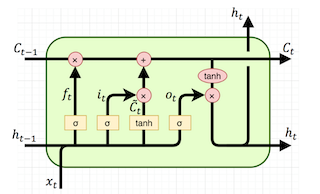

In [ ]:
# Создание активационной функции 
def custom_sigmoid(x):
  return 1/(1-np.exp(-x))

In [ ]:
# Уделимся, что сигмоида зажата между 0 и 1
'Проверим функцию на -бесконечности:', custom_sigmoid(-np.inf), 'Проверим на +бесконечности', custom_sigmoid(np.inf)

('Проверим функцию на -бесконечности:',
 -0.0,
 'Проверим на +бесконечности',
 1.0)

In [ ]:
class custom_lstm():
  # Состояние нейронной сети при инициализации
  # input_dim - размер входного пространства (Х)
  # hidden_dim - размер скрытого пространства (h)
  # Функции активации np.tanh и custom_sigmoid
  def __init__(self, input_dim, hidden_dim):
    # обнуляем оба входа при инициации LSTM
    self.h = np.zeros(hidden_dim)
    self.c = np.zeros(hidden_dim)
    # создаем 4 dense-слоя (матрицы весов)
    self.Wf = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))
    self.Wi = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))
    self.Wo = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))
    self.Wc = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))
    # создаем 4 коэффициента смещения
    self.bf = np.random.normal(size=hidden_dim)
    self.bi = np.random.normal(size=hidden_dim)
    self.bo = np.random.normal(size=hidden_dim)
    self.bc = np.random.normal(size=hidden_dim)

    # активационные функции (фильтры)
    self.tanh = np.tanh
    self.sigmoid = custom_sigmoid

  # вызов обьекта (запуск нейронки)
  def __call__(self, x):
    hx = np.concatenate([self.h, x]) # сонкатенация предыдущего выхода h с входными данными
    # применение активационных функций перед каждым из слоев нейронки
    f = self.sigmoid(hx @ self.Wf + self.bf)
    i = self.sigmoid(hx @ self.Wi + self.bi)
    o = self.sigmoid(hx @ self.Wo + self.bo)
    c = self.tanh(hx @ self.Wc + self.bc)

  # вентили "забывания"
    self.c = f*self.c
    self.c += i*c
    # формирование выходного вектора
    self.h = o*self.tanh(self.c)

    return self.h

In [ ]:
# Инициируем LSTM
lstm = custom_lstm(5, 10)

In [ ]:
# Подадим на вход сети Х
x = np.array([1.,2,3,4,5])
y = lstm(x)
y

array([-3.82101823e-02, -4.72697200e-04, -4.24793170e-01, -1.20449300e+00,
        3.96589965e-02, -1.79645013e-03, -1.29588485e-02, -2.47027249e-04,
        1.05708594e-07,  4.14600793e-06])

In [ ]:
# Убедимся, что h = Y
lstm.h

array([-3.82101823e-02, -4.72697200e-04, -4.24793170e-01, -1.20449300e+00,
        3.96589965e-02, -1.79645013e-03, -1.29588485e-02, -2.47027249e-04,
        1.05708594e-07,  4.14600793e-06])

## GRU (Gated Recurrent Units)
совмещает забывающие и входные вентили в один “обновляющий вентиль” (“update gate”)

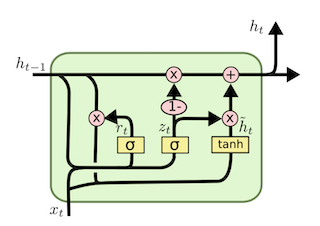

In [ ]:
class custom_gru():
  def __init__(self, input_dim, hidden_dim):
  # Состояние нейронной сети при инициализации
  # input_dim - размер входного пространства (Х)
  # hidden_dim - размер скрытого пространства (h)
  # Функции активации np.tanh и custom_sigmoid
    self.h = np.zeros(hidden_dim)

    # создаем 3 dense-слоя (матрицы весов)
    self.Wz = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))
    self.Wr = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))
    self.Wh = np.random.normal(size=(input_dim+hidden_dim, hidden_dim))

    # создаем 3 коэффициента смещения
    self.bz = np.random.normal(size=hidden_dim)
    self.br = np.random.normal(size=hidden_dim)
    self.bh = np.random.normal(size=hidden_dim)

    # активационные функции (фильтры)
    self.tanh = np.tanh
    self.sigmoid = custom_sigmoid

  # вызов обьекта (запуск нейронки)
  def __call__(self, x):
    hx = np.concatenate([self.h, x])

    r = self.sigmoid(hx @ self.Wr + self.br) # вентиль обновления 
    hrx = np.concatenate([r*self.h, x])

    h = self.tanh(hrx @ self.Wh + self.bh)

    z = self.sigmoid(hx @ self.Wz + self.bz)

    self.h = z*self.h + (1-z)*h

    return self.h

In [ ]:
# Инициируем GRU
gru = custom_gru(5, 10)

In [ ]:
# Подадим на вход сети Х
x = np.array([1.,2,3,4,5])
y = gru(x)
y

array([ 3.33813412e-02, -4.43097519e-03,  9.99857064e-01,  1.59194460e-04,
       -9.87163967e-01,  9.99999932e-01,  1.62949844e+00, -9.20265610e-01,
       -8.84547962e-01,  2.23631798e-01])

In [ ]:
# Убедимся, что h = Y
gru.h

array([ 3.33813412e-02, -4.43097519e-03,  9.99857064e-01,  1.59194460e-04,
       -9.87163967e-01,  9.99999932e-01,  1.62949844e+00, -9.20265610e-01,
       -8.84547962e-01,  2.23631798e-01])